In [8]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dense, Flatten, BatchNormalization, Conv2D, MaxPool2D
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import categorical_crossentropy
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import confusion_matrix
import itertools
import os
import shutil
import random
import matplotlib.pyplot as plt
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
%matplotlib inline

In [2]:
os.chdir('data/Sign-Language-Digits-Dataset')
os.chdir('../..')

In [3]:
train_path = 'data/Sign-Language-Digits-Dataset/train'
valid_path = 'data/Sign-Language-Digits-Dataset/valid'
test_path = 'data/Sign-Language-Digits-Dataset/test'

train_batches = ImageDataGenerator(preprocessing_function=tf.keras.applications.mobilenet.preprocess_input).flow_from_directory(
    directory=train_path, target_size=(224,224), batch_size=10)
valid_batches = ImageDataGenerator(preprocessing_function=tf.keras.applications.mobilenet.preprocess_input).flow_from_directory(
    directory=valid_path, target_size=(224,224), batch_size=10)
test_batches = ImageDataGenerator(preprocessing_function=tf.keras.applications.mobilenet.preprocess_input).flow_from_directory(
    directory=test_path, target_size=(224,224), batch_size=10, shuffle=False)

Found 1712 images belonging to 10 classes.
Found 300 images belonging to 10 classes.
Found 50 images belonging to 10 classes.


In [4]:
mobile = tf.keras.applications.mobilenet.MobileNet()
mobile.summary()

Model: "mobilenet_1.00_224"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
conv1 (Conv2D)               (None, 112, 112, 32)      864       
_________________________________________________________________
conv1_bn (BatchNormalization (None, 112, 112, 32)      128       
_________________________________________________________________
conv1_relu (ReLU)            (None, 112, 112, 32)      0         
_________________________________________________________________
conv_dw_1 (DepthwiseConv2D)  (None, 112, 112, 32)      288       
_________________________________________________________________
conv_dw_1_bn (BatchNormaliza (None, 112, 112, 32)      128       
_________________________________________________________________
conv_dw_1_relu (ReLU)        (None, 112, 112, 32

In [5]:
x = mobile.layers[-6].output

In [7]:
output = Dense(units=10,activation='softmax')(x)

In [9]:
model = Model(inputs=mobile.input, outputs=output)

In [10]:
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
conv1 (Conv2D)               (None, 112, 112, 32)      864       
_________________________________________________________________
conv1_bn (BatchNormalization (None, 112, 112, 32)      128       
_________________________________________________________________
conv1_relu (ReLU)            (None, 112, 112, 32)      0         
_________________________________________________________________
conv_dw_1 (DepthwiseConv2D)  (None, 112, 112, 32)      288       
_________________________________________________________________
conv_dw_1_bn (BatchNormaliza (None, 112, 112, 32)      128       
_________________________________________________________________
conv_dw_1_relu (ReLU)        (None, 112, 112, 32)      0     

In [11]:
lay = model.layers
print(type(lay))
print(lay)
print(len(lay))

<class 'list'>
[<tensorflow.python.keras.engine.input_layer.InputLayer object at 0x000001B277010390>, <tensorflow.python.keras.layers.convolutional.Conv2D object at 0x000001B2767DA0B8>, <tensorflow.python.keras.layers.normalization_v2.BatchNormalization object at 0x000001B2767C68D0>, <tensorflow.python.keras.layers.advanced_activations.ReLU object at 0x000001B276E3EC18>, <tensorflow.python.keras.layers.convolutional.DepthwiseConv2D object at 0x000001B27692DB70>, <tensorflow.python.keras.layers.normalization_v2.BatchNormalization object at 0x000001B276CAC860>, <tensorflow.python.keras.layers.advanced_activations.ReLU object at 0x000001B276CBABA8>, <tensorflow.python.keras.layers.convolutional.Conv2D object at 0x000001B276CC4278>, <tensorflow.python.keras.layers.normalization_v2.BatchNormalization object at 0x000001B276CD3160>, <tensorflow.python.keras.layers.advanced_activations.ReLU object at 0x000001B276D2DFD0>, <tensorflow.python.keras.layers.convolutional.ZeroPadding2D object at 0x0

In [12]:
for layer in model.layers[:-23]:
    layer.trainable = False

In [13]:
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
conv1 (Conv2D)               (None, 112, 112, 32)      864       
_________________________________________________________________
conv1_bn (BatchNormalization (None, 112, 112, 32)      128       
_________________________________________________________________
conv1_relu (ReLU)            (None, 112, 112, 32)      0         
_________________________________________________________________
conv_dw_1 (DepthwiseConv2D)  (None, 112, 112, 32)      288       
_________________________________________________________________
conv_dw_1_bn (BatchNormaliza (None, 112, 112, 32)      128       
_________________________________________________________________
conv_dw_1_relu (ReLU)        (None, 112, 112, 32)      0     

In [14]:
model.compile(optimizer=Adam(lr=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

In [18]:
model.fit(x=train_batches,
        steps_per_epoch=len(train_batches),
        validation_data=valid_batches,
        validation_steps=len(valid_batches),
        epochs=30,
        verbose=2
        )

Epoch 1/30
172/172 - 39s - loss: 0.0494 - accuracy: 0.9959 - val_loss: 0.1162 - val_accuracy: 0.9667
Epoch 2/30
172/172 - 39s - loss: 0.0318 - accuracy: 0.9977 - val_loss: 0.1115 - val_accuracy: 0.9733
Epoch 3/30
172/172 - 38s - loss: 0.0205 - accuracy: 0.9988 - val_loss: 0.0960 - val_accuracy: 0.9800
Epoch 4/30
172/172 - 38s - loss: 0.0190 - accuracy: 0.9971 - val_loss: 0.1063 - val_accuracy: 0.9800
Epoch 5/30
172/172 - 38s - loss: 0.0106 - accuracy: 1.0000 - val_loss: 0.0943 - val_accuracy: 0.9800
Epoch 6/30
172/172 - 39s - loss: 0.0127 - accuracy: 0.9971 - val_loss: 0.1037 - val_accuracy: 0.9767
Epoch 7/30
172/172 - 38s - loss: 0.0151 - accuracy: 0.9988 - val_loss: 0.0874 - val_accuracy: 0.9800
Epoch 8/30
172/172 - 38s - loss: 0.0078 - accuracy: 0.9994 - val_loss: 0.0981 - val_accuracy: 0.9767
Epoch 9/30
172/172 - 39s - loss: 0.0074 - accuracy: 0.9994 - val_loss: 0.0901 - val_accuracy: 0.9833
Epoch 10/30
172/172 - 39s - loss: 0.0066 - accuracy: 0.9988 - val_loss: 0.0832 - val_accura

In [19]:
test_labels = test_batches.classes
print(test_labels)

[0 0 0 0 0 1 1 1 1 1 2 2 2 2 2 3 3 3 3 3 4 4 4 4 4 5 5 5 5 5 6 6 6 6 6 7 7
 7 7 7 8 8 8 8 8 9 9 9 9 9]


In [20]:
predictions = model.predict(x=test_batches, steps=len(test_batches), verbose=0)

In [21]:
%matplotlib inline
from sklearn.metrics import confusion_matrix
import itertools
import matplotlib.pyplot as plt

# 准备数据
import numpy as np
from random import randint
from sklearn.utils import shuffle
from sklearn.preprocessing import MinMaxScaler

In [22]:
cm = confusion_matrix(y_true=test_labels,y_pred=predictions.argmax(axis=1))

In [23]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
            horizontalalignment="center",
            color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [24]:
test_batches.class_indices

{'0': 0,
 '1': 1,
 '2': 2,
 '3': 3,
 '4': 4,
 '5': 5,
 '6': 6,
 '7': 7,
 '8': 8,
 '9': 9}

Confusion matrix, without normalization
[[5 0 0 0 0 0 0 0 0 0]
 [0 5 0 0 0 0 0 0 0 0]
 [0 0 5 0 0 0 0 0 0 0]
 [0 0 0 4 0 1 0 0 0 0]
 [0 0 0 0 5 0 0 0 0 0]
 [0 0 0 0 0 5 0 0 0 0]
 [0 0 0 0 0 0 5 0 0 0]
 [0 0 0 0 0 0 0 5 0 0]
 [0 0 0 0 0 0 0 0 5 0]
 [0 0 0 0 0 0 0 0 0 5]]


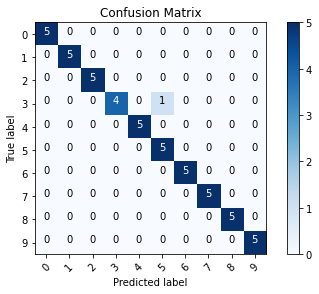

In [25]:
cm_plot_labels = ['0','1','2','3','4','5','6','7','8','9']
plot_confusion_matrix(cm=cm, classes=cm_plot_labels, title='Confusion Matrix')